In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Covid.csv")

In [4]:
df.head(10)

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
0,male,89,1,1,0,0,0,0,0,1,0,0
1,male,68,1,0,0,0,0,0,0,0,0,0
2,male,68,0,0,0,0,0,0,0,1,0,0
3,male,68,1,1,0,0,0,0,0,1,1,1
4,male,50,1,1,1,0,1,0,0,1,0,1
5,male,50,1,1,0,0,0,0,0,0,0,1
6,female,55,1,1,0,0,0,0,0,0,0,0
7,female,55,0,0,0,0,0,0,0,1,0,0
8,female,55,1,1,0,0,0,0,0,0,0,1
9,female,48,1,1,0,0,0,0,0,1,0,0


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [6]:
df.isna().sum()

gender                 0
age_year               0
fever                  0
cough                  0
runny_nose             0
muscle_soreness        0
pneumonia              0
diarrhea               0
lung_infection         0
travel_history         0
isolation_treatment    0
SARS-CoV-2 Positive    0
dtype: int64

In [7]:
df.dropna()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
0,male,89,1,1,0,0,0,0,0,1,0,0
1,male,68,1,0,0,0,0,0,0,0,0,0
2,male,68,0,0,0,0,0,0,0,1,0,0
3,male,68,1,1,0,0,0,0,0,1,1,1
4,male,50,1,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6507,female,44,1,1,0,0,0,0,0,1,0,1
6508,female,44,1,1,0,0,0,0,0,0,0,0
6509,female,58,0,0,0,0,0,0,0,0,0,0
6510,female,58,1,1,0,0,0,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               6512 non-null   object
 1   age_year             6512 non-null   int64 
 2   fever                6512 non-null   int64 
 3   cough                6512 non-null   int64 
 4   runny_nose           6512 non-null   int64 
 5   muscle_soreness      6512 non-null   int64 
 6   pneumonia            6512 non-null   int64 
 7   diarrhea             6512 non-null   int64 
 8   lung_infection       6512 non-null   int64 
 9   travel_history       6512 non-null   int64 
 10  isolation_treatment  6512 non-null   int64 
 11  SARS-CoV-2 Positive  6512 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 610.6+ KB


In [13]:
df.gender[df.gender == "male"]=1
df.gender[df.gender == "female"]=0

C:\Users\moshi\AppData\Local\Temp/ipykernel_13292/1946522788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == "male"]=1
C:\Users\moshi\AppData\Local\Temp/ipykernel_13292/1946522788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == "female"]=0


In [14]:
df['gender'] = df['gender'].astype('int64')

In [15]:
df.info

<bound method DataFrame.info of       gender  age_year  fever  cough  runny_nose  muscle_soreness  pneumonia  \
0          1        89      1      1           0                0          0   
1          1        68      1      0           0                0          0   
2          1        68      0      0           0                0          0   
3          1        68      1      1           0                0          0   
4          1        50      1      1           1                0          1   
...      ...       ...    ...    ...         ...              ...        ...   
6507       0        44      1      1           0                0          0   
6508       0        44      1      1           0                0          0   
6509       0        58      0      0           0                0          0   
6510       0        58      1      1           0                0          0   
6511       1        12      1      1           0                0          0   

      d

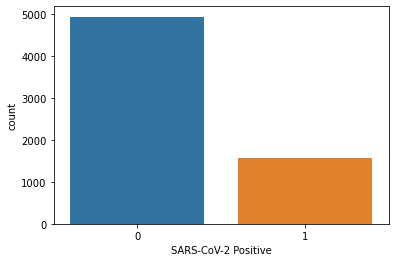

In [16]:
sns.countplot(x="SARS-CoV-2 Positive", data=df);

In [17]:
df.value_counts("gender")

gender
1    3367
0    3145
dtype: int64

In [18]:
df.value_counts("SARS-CoV-2 Positive")

SARS-CoV-2 Positive
0    4940
1    1572
dtype: int64

In [19]:
import scipy
import sklearn
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter

In [21]:
df.shape

(6512, 12)

In [22]:
df.columns

Index(['gender', 'age_year', 'fever', 'cough', 'runny_nose', 'muscle_soreness',
       'pneumonia', 'diarrhea', 'lung_infection', 'travel_history',
       'isolation_treatment', 'SARS-CoV-2 Positive'],
      dtype='object')

In [24]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["SARS-CoV-2 Positive"]]
# Store the variable we are predicting 
target = "SARS-CoV-2 Positive"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(6512, 11)
(6512,)


In [25]:
Counter(df["SARS-CoV-2 Positive"])

Counter({0: 4940, 1: 1572})

In [26]:
from imblearn.under_sampling import NearMiss

In [27]:
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,Y)

In [28]:
X_res.shape,y_res.shape

((3144, 11), (3144,))

In [29]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4940, 1: 1572})
Resampled dataset shape Counter({0: 1572, 1: 1572})


In [30]:
df.shape

(6512, 12)

In [34]:
df.describe()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
count,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000
mean,0.517045,44.019502,0.410780,0.303286,0.084306,0.003993,0.074785,0.005682,0.131296,0.650952,0.216984,0.241400
std,0.499748,16.112865,0.492013,0.459713,0.277867,0.063066,0.263064,0.075169,0.337750,0.476706,0.412223,0.427965
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
corr = X_res.corr() #feature selection pearsons coorelation
corr

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment
gender,1.000000,-0.130356,-0.015913,-0.018009,0.000993,0.018130,0.004404,-0.031158,-0.039571,0.007567,-0.036009
age_year,-0.130356,1.000000,-0.012881,0.020735,0.005100,0.004964,0.003739,0.023885,0.043896,-0.059345,0.053480
fever,-0.015913,-0.012881,1.000000,0.895481,0.376235,0.040580,0.367782,0.037564,0.163541,-0.312286,0.234665
cough,-0.018009,0.020735,0.895481,1.000000,0.416610,0.045122,0.408944,0.027177,0.195446,-0.360051,0.238307
runny_nose,0.000993,0.005100,0.376235,0.416610,1.000000,0.034403,0.977532,0.020513,0.497296,-0.160308,0.181708
muscle_soreness,0.018130,0.004964,0.040580,0.045122,0.034403,1.000000,-0.001572,-0.002066,0.080858,-0.035170,0.083375
pneumonia,0.004404,0.003739,0.367782,0.408944,0.977532,-0.001572,1.000000,0.001422,0.490626,-0.147369,0.169422
diarrhea,-0.031158,0.023885,0.037564,0.027177,0.020513,-0.002066,0.001422,1.000000,0.058116,-0.001308,0.043193
lung_infection,-0.039571,0.043896,0.163541,0.195446,0.497296,0.080858,0.490626,0.058116,1.000000,-0.219116,0.373897
travel_history,0.007567,-0.059345,-0.312286,-0.360051,-0.160308,-0.035170,-0.147369,-0.001308,-0.219116,1.000000,0.002343


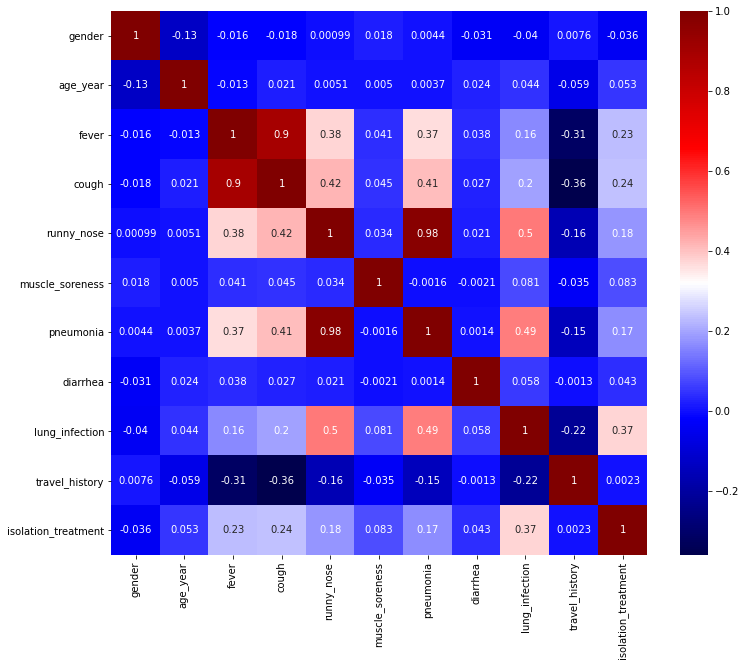

In [36]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");

In [37]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j]))>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features= correlation(X_res,0.85)
print(len(corr_features))
print(corr_features)

2
{'pneumonia', 'cough'}


In [39]:
X_res=X_res.drop(columns="pneumonia")

In [40]:
X_res=X_res.drop(columns="cough")

In [41]:
X_res.shape

(3144, 9)

In [42]:
X_res.head()

,gender,age_year,fever,runny_nose,muscle_soreness,diarrhea,lung_infection,travel_history,isolation_treatment
0,0,55,1,0,0,0,0,0,0
1,1,44,1,0,0,0,0,0,0
2,0,47,1,0,0,0,0,1,0
3,1,45,1,0,0,0,0,0,0
4,1,49,1,0,0,0,0,0,0


In [44]:
y_res.head()

0    0
1    0
2    0
3    0
4    0
Name: SARS-CoV-2 Positive, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state =40)

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)